# 딥러닝응용 7주차 실습 
## 0. Linear AE
DSA 데이터에서 lyingBack = normal, sitting = abnormal

In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('DSA_features.csv')
df.drop('people', axis=1, inplace=True)
df.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting


In [33]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

Text(0, 0.5, 'Count')

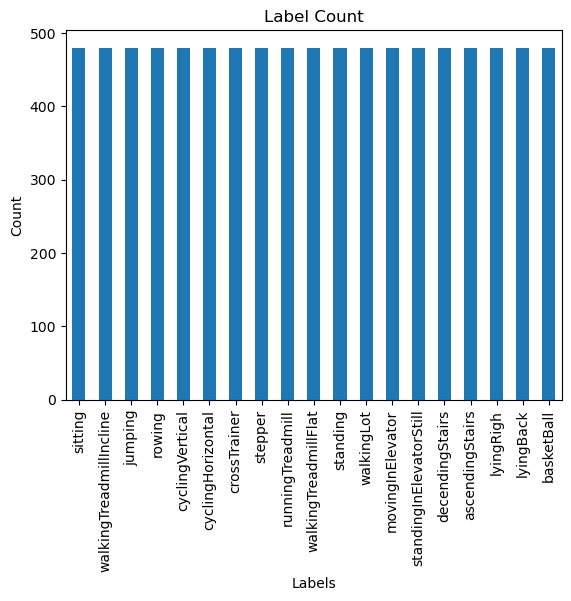

In [34]:
import matplotlib.pyplot as plt

label_counts = df['activity'].value_counts()
label_counts.plot(kind='bar')

plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [35]:
activity_map = {'lyingBack': 0, 'movingInElevator': 1}

df = df[df['activity'].isin(activity_map.keys())]
df['activity'] = df['activity'].map(activity_map)

df.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,0
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,0
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,0
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,0
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,0


Text(0, 0.5, 'Count')

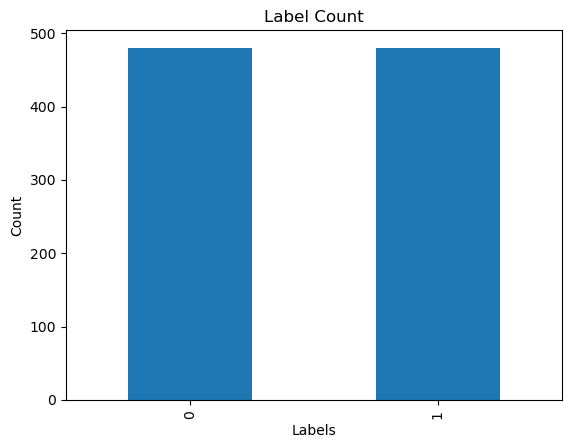

In [36]:
import matplotlib.pyplot as plt

label_counts = df['activity'].value_counts()
label_counts.plot(kind='bar')

plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('activity', axis=1)  
y = df['activity']                   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (768, 270)
X_test: (192, 270)
y_train: (768,)
y_test: (192,)


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [39]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 16  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [40]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_16 (Dense)            (None, 16)                4336      
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 270)               2430      
                                                                 
Total params: 6,974
Trainable params: 6,974
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/100
3/3 [==============================] - 0s 24ms/step - loss: 8.3417 - val_loss: 8.1819
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 8.3322 - val_loss: 8.1718
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 8.3215 - val_loss: 8.1591
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 8.3079 - val_loss: 8.1435
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 8.2903 - val_loss: 8.1233
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 8.2680 - val_loss: 8.0972
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 8.2404 - val_loss: 8.0650
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 8.2063 - val_loss: 8.0266
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 8.1674 - val_loss: 7.9843
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 8.1250 - val_loss: 7.9387
Epoch 11/100
3/3 [=========

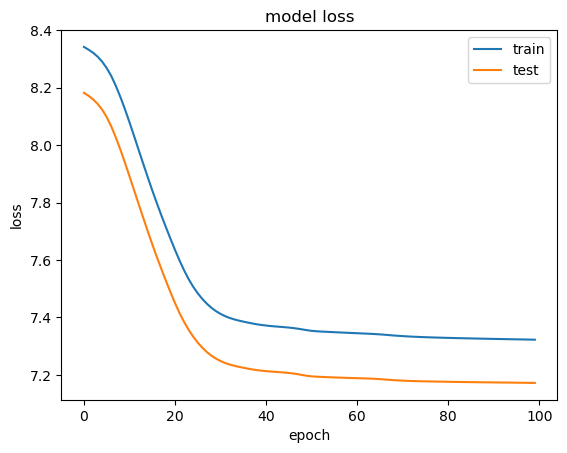

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [43]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

6/6 [==============================] - 0s 588us/step


,reconstruction_error,true_class
count,192.000000,192.000000
mean,7.914670,0.552083
std,5.812212,0.498580
min,4.544476,0.000000
25%,4.651461,0.000000
50%,5.005685,1.000000
75%,8.426478,1.000000
max,32.729539,1.000000


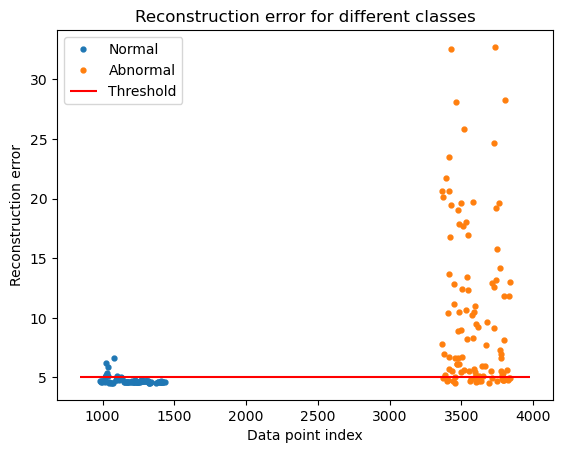

In [44]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
threshold=5
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

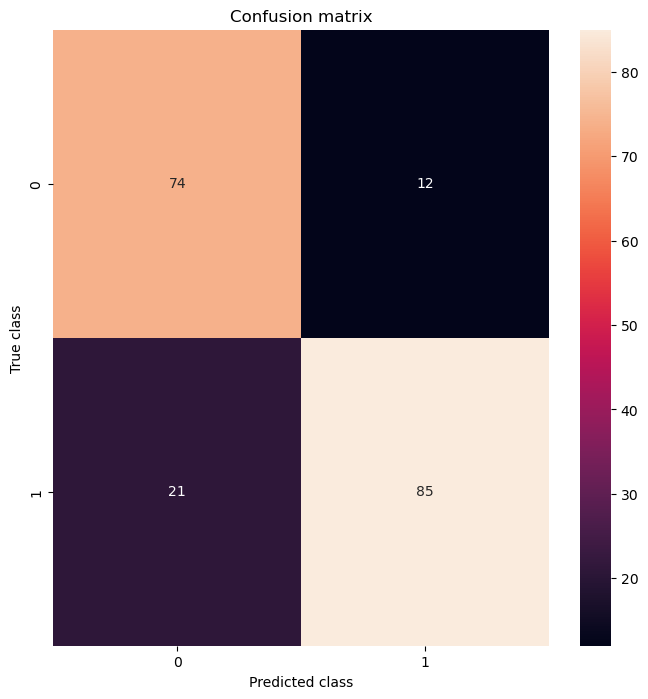

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        86
           1       0.88      0.80      0.84       106

    accuracy                           0.83       192
   macro avg       0.83      0.83      0.83       192
weighted avg       0.83      0.83      0.83       192



In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=[0,1], yticklabels=[0,1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

## 2. NonLinear AE

In [46]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 16  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [47]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_20 (Dense)            (None, 16)                4336      
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 16)                144       
                                                                 
 dense_23 (Dense)            (None, 270)               4590      
                                                                 
Total params: 9,206
Trainable params: 9,206
Non-trainable params: 0
_________________________________________________________________


In [48]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/100
3/3 [==============================] - 0s 25ms/step - loss: 8.3917 - val_loss: 8.2011
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 8.3435 - val_loss: 8.1600
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 8.3023 - val_loss: 8.1172
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 8.2574 - val_loss: 8.0661
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 8.2063 - val_loss: 8.0087
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 8.1489 - val_loss: 7.9474
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 8.0877 - val_loss: 7.8826
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 8.0238 - val_loss: 7.8165
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 7.9595 - val_loss: 7.7522
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 7.8964 - val_loss: 7.6909
Epoch 11/100
3/3 [==========

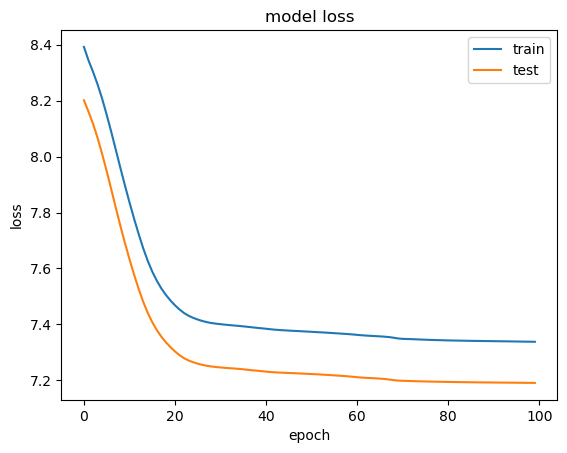

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [50]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

6/6 [==============================] - 0s 472us/step


,reconstruction_error,true_class
count,192.000000,192.000000
mean,7.938808,0.552083
std,5.853301,0.498580
min,4.513827,0.000000
25%,4.652366,0.000000
50%,4.997799,1.000000
75%,8.503347,1.000000
max,33.040952,1.000000


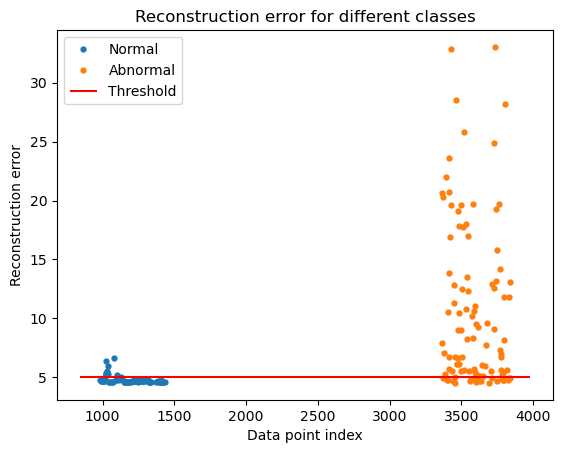

In [51]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
threshold=5
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

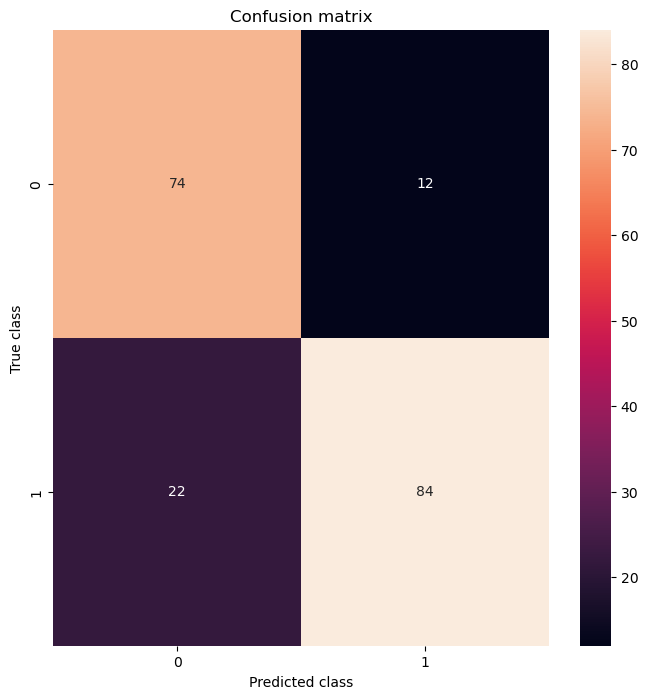

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        86
           1       0.88      0.79      0.83       106

    accuracy                           0.82       192
   macro avg       0.82      0.83      0.82       192
weighted avg       0.83      0.82      0.82       192



In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=[0,1], yticklabels=[0,1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

## 3. Denoising AE

In [53]:
# 노이즈 함수 
noise_factor = 0.5

noise_df = df.copy()

for column in noise_df.columns[:-1]:
    noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=len(noise_df[column]))
    noise_df[column] += noise


X_n = noise_df.drop(columns='activity')  
y_n = noise_df['activity']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2, random_state=42)

# Print results
print("X_test with noise:")
print(X_test_n[:2])
print("y_test:")
print(y_test_n[:2])

X_test with noise:
      T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
3716     9.339146     13.7030      6.1798    1.474647    1.214351   
1437    -1.677681     -1.6247     -1.7507    0.000395    0.019869   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
3716     1.064353     0.081065      2.1818     -1.3620    0.524790  ...   
1437    -0.756556    -2.263309     -2.1677     -2.3942    0.001302  ...   

      LL_ymag_min  LL_ymag_var  LL_ymag_std  LL_ymag_skew  LL_zmag_mean  \
3716     -0.18179     0.012179     0.110358      0.473072      0.045720   
1437      0.27252     0.000059     0.007708     -0.915712     -0.651007   

      LL_zmag_max  LL_zmag_min  LL_zmag_var  LL_zmag_std  LL_zmag_skew  
3716      0.27009     -0.23000     0.030583     0.174881     -0.003957  
1437     -0.62476     -0.67231     0.000064     0.008024      0.425869  

[2 rows x 270 columns]
y_test:
3716    1
1437    0
Name: activity, dtype: int64


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Reshape
from tensorflow.keras.optimizers import Adam

In [55]:
dropout_encoder = Sequential([Flatten(), 
                                       Dropout(0.5), 
                                       Dense(100, activation="relu"), 
                                       Dense(30, activation="relu")
                                       ])
dropout_decoder = Sequential([Dense(100, activation="relu"), 
                                       Dense(28 * 28), 
                                       Reshape([28, 28])
                                       ])

dropout_ae = Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [56]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

# Autoencoder model configuration
input_dim = X_train.shape[1]
encoding_dim = 16  # Set the encoding dimension (can be adjusted)

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dropout(0.5)(encoded)  # Add dropout layer
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# Decoder
decoded = Dense(int(encoding_dim), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Create the autoencoder model
denoise_ae = Model(inputs=input_layer, outputs=decoded)

# Compile the model
denoise_ae.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Display the model summary
denoise_ae.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_28 (Dense)            (None, 16)                4336      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 16)                144       
                                                                 
 dense_31 (Dense)            (None, 270)               4590      
                                                                 
Total params: 9,206
Trainable params: 9,206
Non-trainable p

In [57]:
# Train the autoencoder
history = denoise_ae.fit(X_train, X_train,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_train_n, X_train_n),
                          )

Epoch 1/100
3/3 [==============================] - 0s 26ms/step - loss: 8.3250 - val_loss: 8.3150
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 8.3064 - val_loss: 8.2975
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 8.2835 - val_loss: 8.2749
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 8.2578 - val_loss: 8.2438
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 8.2215 - val_loss: 8.2008
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 8.1840 - val_loss: 8.1453
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 8.1260 - val_loss: 8.0819
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 8.0701 - val_loss: 8.0132
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 8.0036 - val_loss: 7.9420
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 7.9426 - val_loss: 7.8738
Epoch 11/100
3/3 [==========

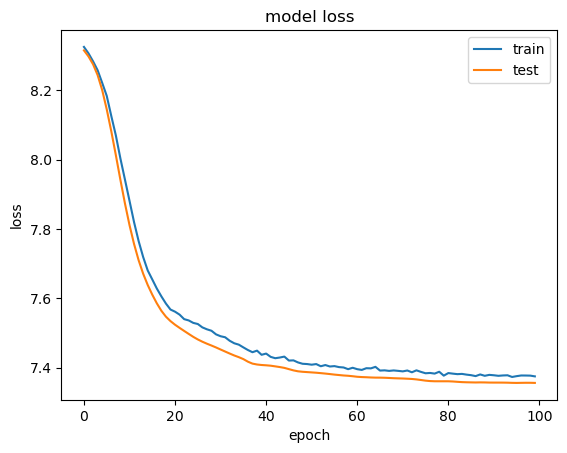

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [59]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = denoise_ae.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

6/6 [==============================] - 0s 541us/step


,reconstruction_error,true_class
count,192.000000,192.000000
mean,7.965967,0.552083
std,5.815897,0.498580
min,4.526513,0.000000
25%,4.686189,0.000000
50%,5.055994,1.000000
75%,8.457970,1.000000
max,32.942049,1.000000


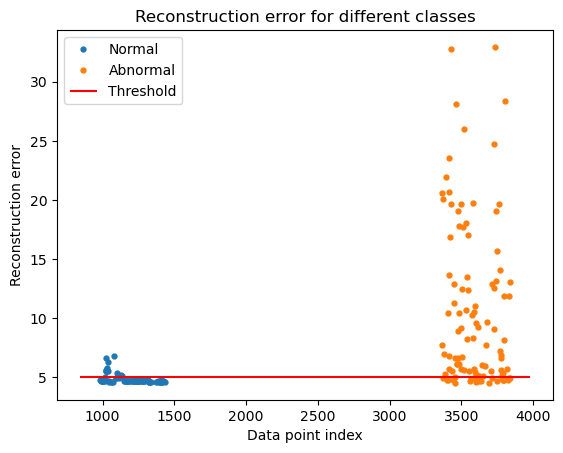

In [60]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
threshold=5
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

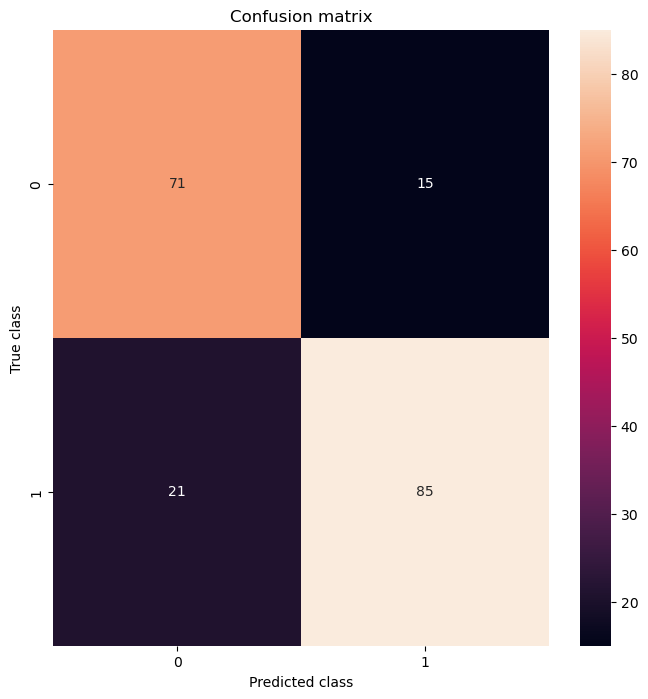

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        86
           1       0.85      0.80      0.83       106

    accuracy                           0.81       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.81      0.81      0.81       192



In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=[0,1], yticklabels=[0,1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


print(classification_report(error_df.true_class, y_pred))

***

## Source Code
[reference]
https://github.com/kainos14/CVAE/blob/main/CVAE.py

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Perform a <Hierarchical Data Balancing> procedure before file loading
features = pd.read_csv("C:/Users/GC/Extracted_Features_org.csv", index_col=0)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
features['activity']=le.fit_transform(features['activity'])

# Feature Selection
df_corr=df.corr()
matrix=df_corr.to_numpy()
target_row = matrix[-1, :]
indices_above_threshold = np.where(target_row >= 0.4)[0]
column_names = features.columns.tolist()
list0 = features.columns[indices_above_threshold].tolist()
df_total=features[list0]
df_corr=df_total.corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=3)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()
sns.set(font_scale=1)

# Denosing
No_noise_df = df_total.copy()
noise_factor = 0.5
df['ADX_y_acc_mean'] = df['ADX_y_acc_mean'] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=num)
df['ADX_y_acc_max'] = df['ADX_y_acc_max'] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=num)
df['MMA_y_acc_mean'] = df['MMA_y_acc_mean'] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=num)
df['MMA_y_acc_max'] = df['MMA_y_acc_max'] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=num)
# This source is for the SisFall dataset. 
# You only need to modify the related feature names to use other datasets.

# Noisy Data
X_train, X_test = train_test_split(df_total, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

# Validation data without noisy
X_train2, X_test2 = train_test_split(No_noise_df, test_size=0.1, random_state=42)
X_train2.shape, X_test2.shape

# Normal = 0 / Fall = 1
normal = X_train[X_train['activity'] == 0]
normal.shape
normal2 = X_train2[X_train2['activity'] == 0]
normal.shape

# Data Debugging
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=normal2, x='ADX_y_acc_mean', y='MMA_y_acc_mean', hue='activity')
plt.title('Seaborn Scatter Plot with Labels')
plt.show()

#Pre-calculating threadhold value by Exploratory Data Analysis (EDA)
normal = normal[(normal['ADX_y_acc_mean'] > -250)]
normal2 = normal2[(normal2['ADX_y_acc_mean'] > -250)]

y_train = normal['activity']
X_train_normal_train = normal.drop(['activity'], axis=1)
y_train2 = normal2['activity']
X_train_normal_train2 = normal2.drop(['activity'], axis=1)
y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)
y_test2 = X_test2['activity']
X_test2 = X_test2.drop(['activity'], axis=1)
X_train_ft = X_train_normal_train.values
X_train_ft2 = X_train_normal_train2.values
X_test = X_test.values
X_test2 = X_test2.values

X_train_ft.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train_ft)
scaler.fit(X_test)

X_train_ft2 = scaler.transform(X_train_ft)
X_train_ft = scaler.transform(X_train_ft2)
X_test = scaler.transform(X_test)
X_test2 = scaler.transform(X_test2)

timestamp = 20

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

y_train_array = np.array(y_train)
train_set = np.c_[X_train_ft, y_train_array]

y_train_array = np.array(y_train)
train_set2 = np.c_[X_train_ft2, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

y_test_array = np.array(y_test2)
test_set2 = np.c_[X_test2, y_test_array]

X_train, y_train = split_sequences(train_set, timestamp)
print(X_train.shape, y_train.shape)
X_train2, y_train = split_sequences(train_set2, timestamp)
print(X_train.shape, y_train.shape)
X_test, y_test = split_sequences(test_set, timestamp)
print(X_test.shape, y_test.shape)
X_test2, y_test2 = split_sequences(test_set2, timestamp)
print(X_test2.shape, y_test2.shape)

X_train.shape, X_train2.shape, X_test.shape, y_train.shape, y_test.shape

import numpy as np
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MultiHeadAttention
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Masking, TimeDistributed, Lambda
from tensorflow.keras.losses import mse, binary_crossentropy, mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense, Conv1D, Conv1DTranspose
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    hidden_with_time_axis = tf.expand_dims(query, 1)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))
    attention_weights = tf.nn.softmax(score, axis=1)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

latent_dim = 2
inter_dim = 3
timesteps, features = X_train.shape[1], X_train.shape[2]

def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0] 
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss(x, x_decoded_mean):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
	
    # compute the KL loss
    kl_loss = - 0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.square(K.exp(z_log_sigma)), axis=-1)
	
    # return the average loss over all 
    total_loss = K.mean(reconstruction_loss + kl_loss)        
    return total_loss

# timesteps, features
input_x = Input(shape=(timesteps, features), name='InputTimeSeries') 

#intermediate dimension 
h = Conv1D(filters=48, kernel_size=5, padding="same", strides=1, activation="relu")(input_x)
h = Conv1D(filters=32, kernel_size=5, padding="same", strides=1)(h)
h = Conv1D(filters=16, kernel_size=5, padding="same", strides=1)(h)
h = LSTM(inter_dim, activation='relu', return_sequences=True)(h)
h = SeqSelfAttention(attention_activation='sigmoid')(h)
h = LSTM(inter_dim, activation='relu', return_sequences=False)(h)
h = Dense(inter_dim, activation='relu')(h)
h = Dense(inter_dim, activation='relu')(h)

#z_layer
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)
z = Lambda(sampling)([z_mean, z_log_sigma])

# Reconstruction decoder
decoder1 = RepeatVector(timesteps)(z)
decoder1 = Dense(inter_dim, activation='relu')(decoder1)
decoder1 = Dense(inter_dim, activation='relu')(decoder1)
decoder1 = LSTM(inter_dim, activation='relu', return_sequences=True)(decoder1)
decoder1 = LSTM(inter_dim, activation='relu', return_sequences=True)(decoder1)
decoder1 = SeqSelfAttention(attention_activation='sigmoid')(decoder1)
decoder1 = Conv1DTranspose(filters=16, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
decoder1 = Conv1DTranspose(filters=32, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
decoder1 = Conv1DTranspose(filters=48, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
decoder1 = TimeDistributed(Dense(features))(decoder1)

model = Model(input_x, decoder1)
model.compile(optimizer='adam', loss=vae_loss, metrics=['accuracy'])
model.summary()

history = model.fit(X_train, X_train,
                        shuffle=True,
                        epochs=100,
                        validation_data =(X_train_n, X_train_n),                        
                        batch_size=256)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracys')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

from sklearn.metrics import mean_squared_error

valid_x_predictions = model.predict(X_test)
error = flatten(X_test) - flatten(valid_x_predictions)

valid_mse = np.mean(np.power(flatten(X_test) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': valid_mse,'true_class': y_test})
error_df.describe()
error_df['true_class'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.boxplot(x='true_class', y='reconstruction_error', data=error_df, showfliers=False, saturation=1)
plt.ylabel('Distribution')
plt.axhline(y= 0.1, xmin=0.01, xmax=1,dashes=(5,5), c='g')
plt.xticks(rotation=90)
plt.show()

threshold =  0.10

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

LABELS = ["Normal", "Fall"]

y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='(AUC = {:.2f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()